### NumPy

In [5]:
import numpy as np

def numbers():
    X = []
    number = input("Enter a number (<Enter key> to quit)")
    
    while number != "":
        try:
            x = float(number)
            X.append(x)
        except ValueError:
            print('>>> NOT a number! lgnored..')
        number = input("Enter a number (<Enter key> to quit)")
    return X

def main():
    nums = numbers()   # Pyrhon list
    num = np.array(nums)   # list를 Numpy ndarray로 변환
    print("sum", num.sum())
    print("mean", num.mean())
    print("std", num.std())
    print("median", np.median(num))   # num.median() 이 아님

main()

Enter a number (<Enter key> to quit)20
Enter a number (<Enter key> to quit)61
Enter a number (<Enter key> to quit)30
Enter a number (<Enter key> to quit)88
Enter a number (<Enter key> to quit)
sum 199.0
mean 49.75
std 26.76167969317322
median 45.5


* 데이터의 행렬 변환
    * NumPy는 기본적인 수학 계산과 함께 영상, 이미지, 텍스트, 소리 등 다양한 형태의 데이터를 숫자 혹은 행렬 형태로 표현한다.
    * 컴퓨터는 0과 1의 2진수로 이루어진 산술 연산만 가능하기 때문에 복잡한 데이터를 숫자로 표현한 뒤 계산하기 때문
    * [A Visual Intro to NumPy and Data Representation](http://jalammar.github.io/visual-numpy/)

> 소리 데이터의 경우 NumPy 표현
>> 1차원 array로 표현. CD음원파일의 경우, 44.1kHz의 샘플링 레이트로 -32767 ~ 32768의 정수 값을 갖는다.

> 흑백 이미지의 경우 NumPy로 표현
>> 이미지 사이즈의 세로x가로 형태의 행렬(2차원 ndarray)로 나타내고, 각 원소는 픽셀별로 명도(grayscale)를 0~255 의 숫자로 환산하여 표시한다. 0은 검정, 255는 흰색이다.

> 컬러 이미지의 경우 NumPy로 표현
>> 이미지 사이즈의 세로x가로 x3 형태의 3차원 행렬이다. 3은 Red, Green, Blue계열의 3 색을 의미한다.

> 자연어(블로그에서는 Language로 표기)의 경우 NumPy로 표현
>> 임베딩(Embedding)이라는 과정을 거쳐 ndarray로 표현될 수 있다. 블로그의 예시에서는 71,290개의 단어가 들어있는 (문장들로 이루어진) 데이터셋이 있을때, 이를 단어별로 나누고 0 - 71,289로 넘버링했다. 이를 토큰화 과정이라고 한다. 이 토큰을 50차원의 word2vec embedding 을 통해 [batch_size, sequence_length, embedding_size]의 ndarray로 표현할 수 있다.

* 픽셀과 이미지

: 디지털로 표현되는 이미지는 수많은 점으로 구성되어 있는데 이 점들을 픽셀이라고 한다.

아래의 이미지는 동일한 사이즈의 이미지에 대해 픽셀이 1 x 1 (1개)일 때부터 100 x 100 (10,000개)일 때 이미지의 해상도를 나타내고 있다.

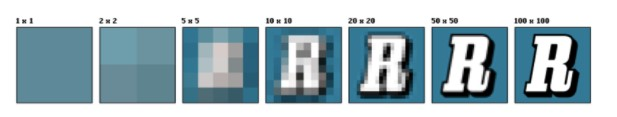

<span style="color:gray"><center><https://en.wikipedia.org/wiki/Image_resolution></center></span>

* 이미지는 수많은 점(픽셀)로 구성되어 있다.
* 각각의 픽셀은 r,g,b 값 3개 요소의 튜플로 색상이 표시됨.
* 흑백의 경우에는 Gray 스케일로 나타냄, 0~255범위싀 숫자 1개의 튜플 값이다.
* Color는 투명도를 포함하는 A(alpha)를 포함해 RGBA 4로 표시하기도 한다.

아래의 이미지처럼 Image의 좌표는 보통 왼쪽 위를 (0,0)으로 표시하고, 오른쪽과 아래로 내려갈수록 좌쵸가 증가한다.

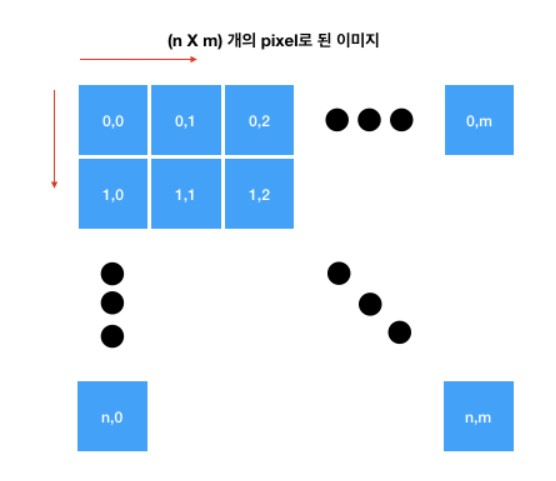

* 이미지와 관련된 파이썬 라이프러리
    * matplotlib
    * PIL

: 이 두 라이브러리는 이미지 파일을 열고, 자르고, 복사하고, rgb 색상 값을 가져오는 등 이미지 파일과 관련된 작업을 수행함.<br/>
보통 이렇게 처리한 파일을 NumPy를 이용해 행렬로 빠르게 연산해서 이미지를 더 빠르게 작업한다.

In [3]:
import matplotlib as mpl
import PIL

print(f'# matplotlib: {mpl.__version__}')
print(f'# PIL: {PIL.__version__}')

# matplotlib: 3.4.3
# PIL: 8.3.2


#### 1. 간단한 이미지 조작

- 이미지 조작에 쓰이는 메서드
    * open: Image.open()
    * size: Image.size
    * filename: Image.filename
    * crop: Image.crop((x0, y0, xt, yt))
    * resize: Image.resize((w,h))
    * save: Image.save()
    
<h5> 1.1. open

/aiffel/aiffel/data_represent/image/newyork.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>


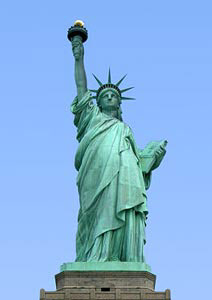

In [9]:
from PIL import Image, ImageColor
import os
img_path = os.getenv("HOME") + "/aiffel/data_represent/image/newyork.jpg"
img = Image.open(img_path)
print(img_path)
print(type(img))
img

> Pillow의 Image.open() 메서드를 통해 이미지 파일을 open
>> 이렇게 해서 얻어진 오브젝트 img는 PIL.JpegImagePlugin.JpegImageFile 라는 타입을 가지고 있음.

<h5>1.2. size

In [10]:
img.size

(212, 300)

: 가로 X 세로 튜플 값으로 반환됨

In [11]:
W, H = img.size
print((W, H))
print(W, H)

(212, 300)
212 300


In [12]:
# 이미지 파일의 타입과 색상 정보 확인
print(img.format)
print(img.size)
print(img.mode)

JPEG
(212, 300)
RGB


<h5>1.3. 이미지 자르기

: .crop() 메서드 이용. 인자로 튜플값을 받고, 가로 세로의 시작점과 가로, 세로의 종료점 총 4개를 입력해줌.

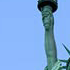

In [13]:
img.crop((30, 30, 100, 100))

<h5> 1.4. 저장

In [15]:
# .save(파일 이름)
# 새로운 이미지 파일명
cropped_img_path = os.getenv("HOME") + "/aiffel/data_represent/image/cropped_img.jpg"
img.crop((30,30,100,100)).save(cropped_img_path)
print("저장")

저장


In [16]:
!ls ~/aiffel/data_represent/image/cropped_img.jpg

/aiffel/aiffel/data_represent/image/cropped_img.jpg


<h5>1.5. 행렬로 변환

In [19]:
import numpy as np
img_arr = np.array(img)
print(type(img))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.ndim)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(300, 212, 3)
3


In [18]:
img.size

(212, 300)

: 컬러(RGB) 이미지 파일이니, 변환된 행렬은 Height X Width X RGB Channel의 모양이고 차원 역시 3차원이다.

In [21]:
# 행렬 값 확인
img_arr

array([[[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       [[133, 180, 250],
        [133, 180, 250],
        [133, 180, 250],
        ...,
        [133, 180, 250],
        [133, 180, 250],
        [133, 180, 250]],

       ...,

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]],

       [[164, 199, 255],
        [164, 199, 255],
        [164, 199, 255],
        ...,
        [164, 199, 255],
        [164, 199, 255],
        [164, 199, 255]]

<h5>1.6. 흑백 모드

: 파일을 열 때 흑백 모드로 사진을 열 수 있음.<br/>
* Image.open().convert('L')
* [Pillow Modes](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes)

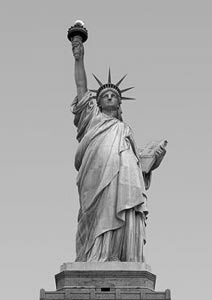

In [22]:
img_g = Image.open(img_path).convert('L')
img_g

In [24]:
img_g_arr = np.array(img_g)
print(type(img_g_arr))
print(img_g_arr.shape)
print(img_g_arr.ndim)
img_g_arr

<class 'numpy.ndarray'>
(300, 212)
2


array([[174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       [174, 174, 174, ..., 174, 174, 174],
       ...,
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195],
       [195, 195, 195, ..., 195, 195, 195]], dtype=uint8)

: 흑백으로 반환된 행렬은 Height X Width, 2차원이다.

<h5>1.7. get color

: 색상 값은 3개 원소의 튜플로, 각각의 원소는 R, G, B 값을 의미한다. <br/>이때, getcolor()는 각 색상이 RGB 값으로 어떻게 표현되는지를 반환한다.

In [25]:
red = ImageColor.getcolor('RED','RGB')
reda = ImageColor.getcolor('red','RGBA')
yellow = ImageColor.getcolor('yellow', 'RGB')
print(red)
print(reda)
print(yellow)

(255, 0, 0)
(255, 0, 0, 255)
(255, 255, 0)


: 딥러닝에서 위와 같은 이미지 조작은 Data augmentation를 할 때 많이 사용된다.
이는 말 그대로 데이터를 증강하는 것으로 딥러닝에서 데이터의 개수를 늘릴 때 사용되는 기법이다.<br/>
* [TensorFlow Data Augmentation Tutorials](https://www.tensorflow.org/tutorials/images/data_augmentation)